In [1]:
# General usage
import math
import numpy as np
import pandas as pd

# Preprocessing
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Modeling
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, matthews_corrcoef, confusion_matrix, precision_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# https://dateutil.readthedocs.io/en/stable/relativedelta.html
from datetime import datetime
from dateutil.relativedelta import relativedelta, MO

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [3]:
# df = pd.read_excel('raw/RBA_KYC_Accounts_ALL_Ids.xlsx')
df_metadata_countries = pd.read_excel('raw/RBA Metadata.xlsx', sheet_name='COUNTRIES', keep_default_na=False)
# df = pd.read_excel('raw/RBA_KYC_Accounts_ALL_Ids.xlsx')
df_metadata_countries = pd.read_excel('raw/RBA Metadata.xlsx', sheet_name='COUNTRIES', keep_default_na=False)

In [2]:
df = pd.read_pickle('storage/RBA_KYC_Accounts_ALL_Ids.pkl')

In [7]:
print('Alex')
print(df.columns[0:11])

Alex
Index(['org_code', 'branchCode', 'customerId', 'fullaccount', 'customerType',
       'creationDate', 'onboarding', 'residentStatus', 'residentCountry',
       'nationalityOriginal', 'extraNationality'],
      dtype='object')


In [30]:
X = df.iloc[:, 0:11]

In [17]:
X.columns

Index(['org_code', 'branchCode', 'customerId', 'fullaccount', 'customerType',
       'creationDate', 'onboarding', 'residentStatus', 'residentCountry',
       'nationalityOriginal', 'extraNationality'],
      dtype='object')

In [19]:
X.describe

<bound method NDFrame.describe of         org_code  branchCode         customerId            fullaccount  \
0              1         201  20100400550000072  020100400550015817000   
1              1         202  20200207860000638  020200207860011330000   
2              1         202  20200207860000638  020200207860011389002   
3              1         202  20200207860000638  020200207860010060000   
4              1         202  20200207860000638  020200207860010010000   
...          ...         ...                ...                    ...   
224863         1         404  40400811920003507  040400811920010020000   
224864         1         202  20200577640010547  020200577640015300042   
224865         1         502  50220271300005255  050220271300012980002   
224866         1         704  70424500690004664  070424500690011396000   
224867         1         209  20900444790003021  020900444790011396000   

        customerType creationDate onboarding  residentStatus residentCountry 

In [20]:
100*X.isnull().sum()/X.isnull().count()

org_code                0.000000
branchCode              0.000000
customerId              0.000000
fullaccount             0.000000
customerType            0.000000
creationDate            0.000000
onboarding              0.000000
residentStatus          0.000000
residentCountry         0.265044
nationalityOriginal     1.529342
extraNationality       99.202643
dtype: float64

In [26]:
X.nunique()

org_code                    1
branchCode                 30
customerId              75339
fullaccount            220434
customerType                2
creationDate             7041
onboarding                  2
residentStatus              2
residentCountry            62
nationalityOriginal        67
extraNationality           35
dtype: int64

### Columns org_code should be removed no added value

In [31]:
X.drop(['org_code'], axis=1, inplace = True)

In [32]:
X.nunique()

branchCode                 30
customerId              75339
fullaccount            220434
customerType                2
creationDate             7041
onboarding                  2
residentStatus              2
residentCountry            62
nationalityOriginal        67
extraNationality           35
dtype: int64

### We must keep extraNationality  even if it is 99% NA it is providing additional information. We need to remove the missing values in residentCountry and nationalityOriginal

In [34]:
# just for the analysis i remove extraNationality
X.drop(['extraNationality'], axis=1, inplace = True)

In [35]:
X.dropna()

,branchCode,customerId,fullaccount,customerType,creationDate,onboarding,residentStatus,residentCountry,nationalityOriginal
0,201,20100400550000072,020100400550015817000,2,2015-04-05,N,1,JO,JO
1,202,20200207860000638,020200207860011330000,1,2013-09-17,N,1,JO,JO
2,202,20200207860000638,020200207860011389002,1,2013-09-17,N,1,JO,JO
3,202,20200207860000638,020200207860010060000,1,2013-09-17,N,1,JO,JO
4,202,20200207860000638,020200207860010010000,1,2013-09-17,N,1,JO,JO
...,...,...,...,...,...,...,...,...,...
224863,404,40400811920003507,040400811920010020000,1,2017-10-22,N,1,JO,JO
224864,202,20200577640010547,020200577640015300042,2,2004-07-27,N,1,JO,JO
224865,502,50220271300005255,050220271300012980002,1,2000-08-23,N,1,JO,JO
224866,704,70424500690004664,070424500690011396000,1,2008-01-16,N,1,JO,JO


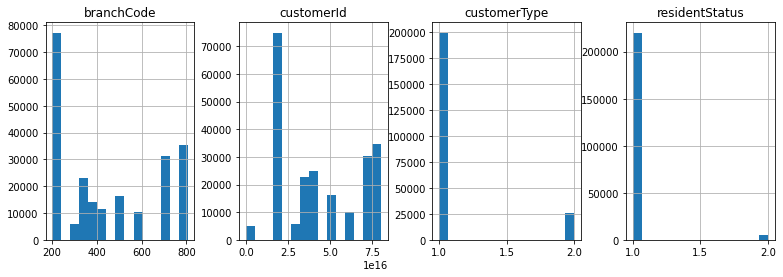

In [36]:
X.select_dtypes(include=['int64', 'float64']).hist(bins=15, figsize=(20, 30), layout=(6, 6));

In [38]:
X.mode()

,branchCode,customerId,fullaccount,customerType,creationDate,onboarding,residentStatus,residentCountry,nationalityOriginal
0,202,30205511090005696,020902507770010010000,1,2013-11-20,N,1,JO,JO


<AxesSubplot:>

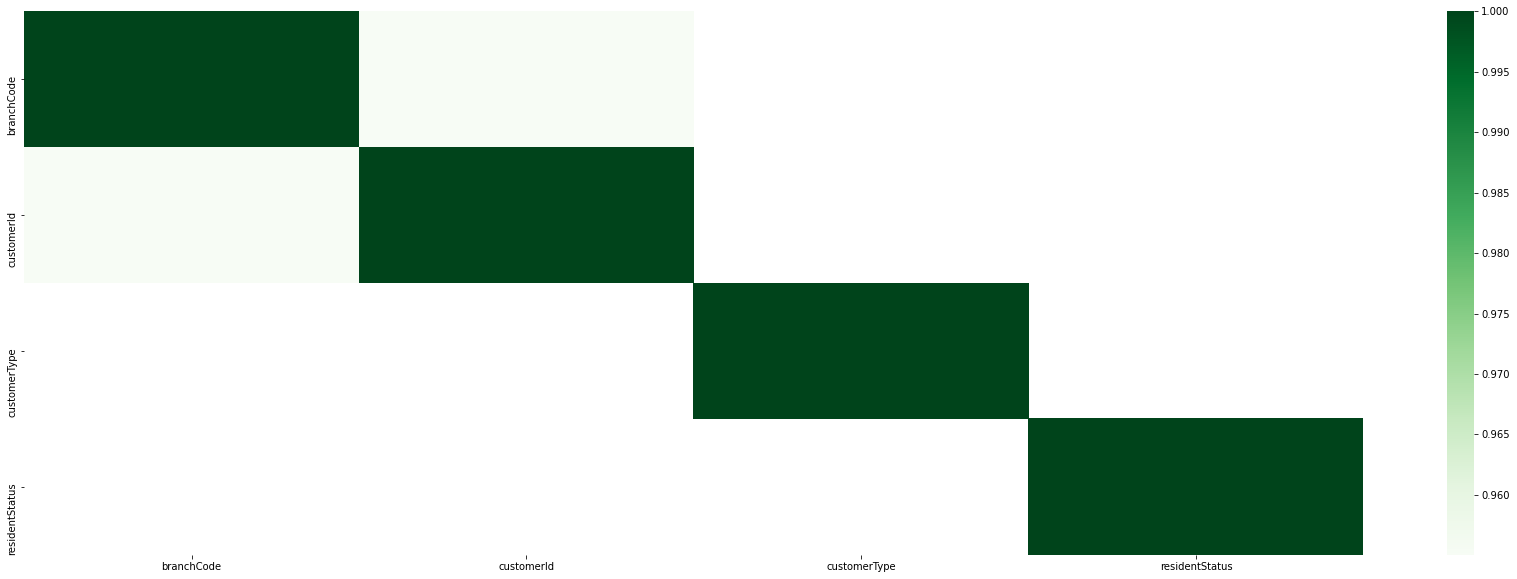

In [39]:
corr = X.corr()

kot = corr[corr>=.9]
plt.figure(figsize=(30,10))
sns.heatmap(kot, cmap="Greens")

### The columns are highly correlated

In [40]:
num_columns = X.select_dtypes(include=['int64', 'float64']).columns
num_feats = X.loc[:, num_columns]

for var in num_columns:
    if sum(1*num_feats[var].isnull()):
        print(var, 'has missings')
        mean_ = cat_feats[var].mean().iloc[0]
        num_feats.loc[num_feats[var].isnull(), var] = mean_
        num_feats[var+'_missing'] = 1*num_feats[var].isnull()

<AxesSubplot:ylabel='branchCode'>

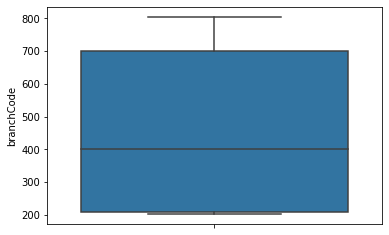

In [41]:
import seaborn as sns
sns.boxplot(y=df['branchCode'])

<AxesSubplot:ylabel='customerId'>

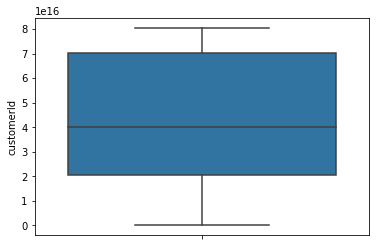

In [42]:
sns.boxplot(y=df['customerId'])